In [4]:
# adapted from https://muon-tutorials.readthedocs.io/en/latest/cite-seq/1-CITE-seq-PBMC-5k.html

In [5]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import sys
import os
from pathlib import Path
import muon as mu
import mudatasets as mds
import seaborn as sns
from muon import prot as pt

In [6]:
# import requires setting a PYTHONPATH with the data_import directory
import h5ad_preparation as prep

In [7]:
mdata = mds.load("pbmc5k_citeseq", data_dir=prep.basedir, full=True)

■ File filtered_feature_bc_matrix.h5 from pbmc5k_citeseq has been found at /Users/dan.plischke@bayer.com/Desktop/cellenium/scratch/pbmc5k_citeseq/filtered_feature_bc_matrix.h5
■ Checksum is validated (md5) for filtered_feature_bc_matrix.h5
■ File minipbcite.h5mu from pbmc5k_citeseq has been found at /Users/dan.plischke@bayer.com/Desktop/cellenium/scratch/pbmc5k_citeseq/minipbcite.h5mu
■ Checksum is validated (md5) for minipbcite.h5mu
■ File pbmc5k_citeseq_processed.h5mu from pbmc5k_citeseq has been found at /Users/dan.plischke@bayer.com/Desktop/cellenium/scratch/pbmc5k_citeseq/pbmc5k_citeseq_processed.h5mu


/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudatasets/core.py:69: UserWarning: ■ Checksum does not match (md5), will re-download pbmc5k_citeseq_processed.h5mu
  warn(
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46866/46866 [00:42<00:00, 1094.51it/s, 385.4MiB, pbmc5k_citeseq_processed.h5mu, pbmc5k_citeseq]
/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudatasets/core.py:203: UserWarning: Dataset is in the 10X .h5 format and can't be loaded as backed.
  warn("Dataset is in the 10X .h5 format and can't be loaded as backed.")


■ Loading filtered_feature_bc_matrix.h5...


/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


In [8]:
safe_copy = mdata.copy()

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


In [9]:
mdata = safe_copy.copy()

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/anndata/_core/anndata.py:1832: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:479: UserWarning: var_names are not unique. To make them unique, call `.var_names_make_unique`.
  warnings.warn(


In [10]:
mdata.mod['prot'].var_names_make_unique()
mdata.mod['prot'].var_names = [ele.split('_')[0] for ele in mdata.mod['prot'].var_names]

In [11]:
mdata.mod['rna'].var_names_make_unique()

In [12]:
mdata = mu.MuData({'prot':mdata.mod['prot'],'rna':mdata.mod['rna']})

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


# Protein/antibody

In [13]:
prot = mdata.mod['prot']

In [14]:
prot.layers['counts'] = prot.X

In [15]:
# normalize
pt.pp.clr(prot)

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/muon/_prot/preproc.py:219: UserWarning: adata.X is sparse but not in CSC format. Converting to CSC.
  warn("adata.X is sparse but not in CSC format. Converting to CSC.")


... storing 'feature_types' as categorical
... storing 'genome' as categorical


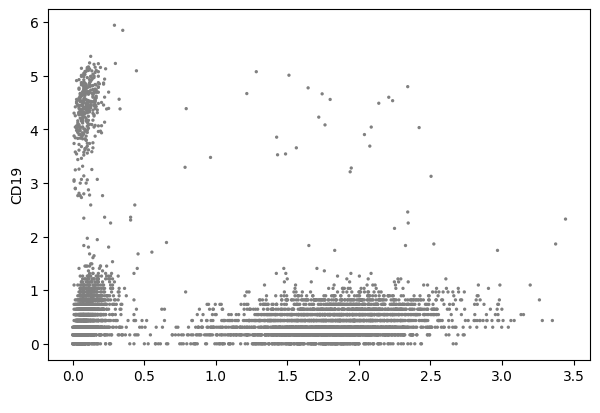

In [16]:
sc.pl.scatter(prot, x="CD3", y="CD19")

# Downstream analysis

In [17]:
sc.tl.pca(prot)

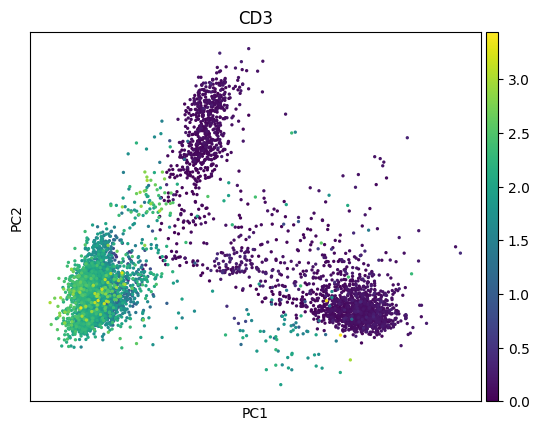

In [18]:
sc.pl.pca(prot, color='CD3')

In [19]:
# clustering
sc.pp.neighbors(prot)
sc.tl.leiden(prot, resolution=.5)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [20]:
# umap
sc.tl.umap(prot, random_state=1)

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


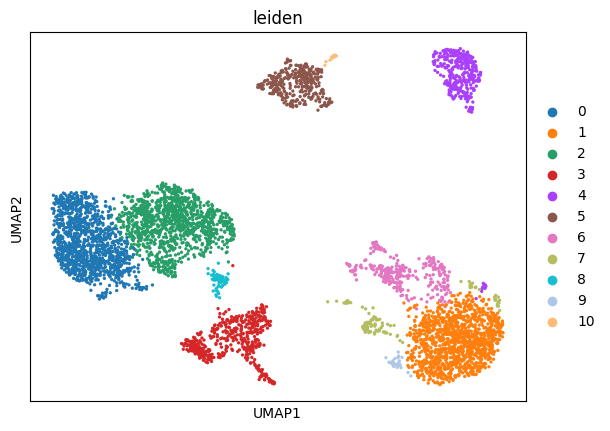

In [21]:
sc.pl.umap(prot, color='leiden')

In [22]:
prep.remove_raw_and_layers(prot)

In [23]:
prot.obs['leiden_by_prot'] = prot.obs.leiden.astype("str").values
prot.obs.leiden_by_prot = prot.obs.leiden_by_prot.astype("category")

In [24]:
prep.calculate_differentially_expressed_genes(prot, ['leiden_by_prot'])

diff.exp. genes: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.02it/s]
20231115-133413.911 55610 INFO root:369 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['leiden_by_prot']


,ref_attr_value,names,scores,logfoldchanges,pvals,pvals_adj,cmp_attr_value,attribute_name
0,0,CD27,38.133255,2.638560,0.000000e+00,0.000000e+00,_OTHERS_,leiden_by_prot
1,0,CD3,33.497448,2.038088,5.250408e-246,8.400652e-245,_OTHERS_,leiden_by_prot
2,0,CD4,29.430212,1.857720,2.255797e-190,1.443710e-189,_OTHERS_,leiden_by_prot
3,0,CD197,27.397385,0.683702,2.946612e-165,1.347022e-164,_OTHERS_,leiden_by_prot
4,0,CD278,22.870260,0.904049,9.188326e-116,2.940264e-115,_OTHERS_,leiden_by_prot
...,...,...,...,...,...,...,...,...
1227,8,CD28,-0.430498,-0.119182,6.668337e-01,6.668337e-01,10,leiden_by_prot
1228,8,CD27,-3.300482,-0.771775,9.651904e-04,1.625584e-03,10,leiden_by_prot
1229,9,CD14,6.028777,3.926030,1.652049e-09,6.608196e-09,10,leiden_by_prot
1230,9,CD86,6.000069,3.406221,1.972341e-09,7.012768e-09,10,leiden_by_prot


# RNA

In [25]:
rna = mdata.mod['rna']
rna

AnnData object with n_obs × n_vars = 5247 × 33538
    var: 'gene_ids', 'feature_types', 'genome'

In [26]:
rna.var['mt'] = rna.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(rna, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [27]:
mu.pp.filter_var(rna, 'n_cells_by_counts', lambda x: x >= 3)

In [28]:
mu.pp.filter_obs(rna, 'n_genes_by_counts', lambda x: (x >= 200) & (x < 5000))
# Same as the following but doesn't copy the object
#   sc.pp.filter_cells(rna, min_genes=200)
#   rna = rna[rna.obs.n_genes_by_counts < 5000, :]

mu.pp.filter_obs(rna, 'total_counts', lambda x: (x > 1500) & (x < 15000))
mu.pp.filter_obs(rna, 'pct_counts_mt', lambda x: x < 20)

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


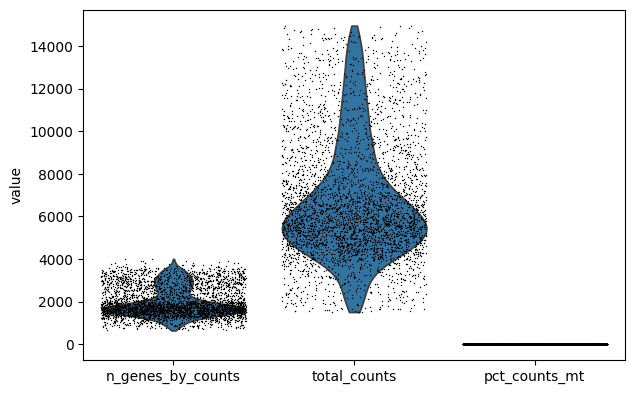

In [30]:
sc.pl.violin(rna, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=False)


In [31]:
# normalize
sc.pp.normalize_total(rna, target_sum=1e4)
sc.pp.log1p(rna)

In [32]:
# feature selection
sc.pp.highly_variable_genes(rna, min_mean=0.02, max_mean=4, min_disp=0.5)

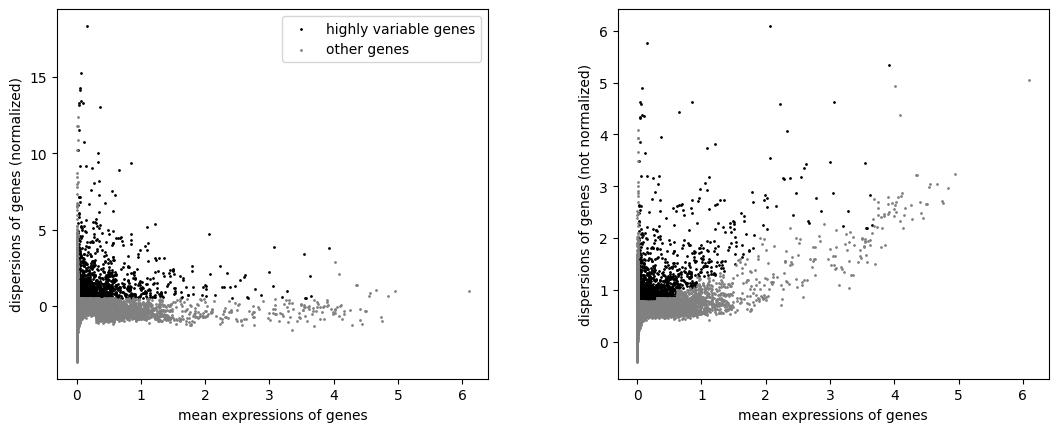

In [33]:
sc.pl.highly_variable_genes(rna)

In [34]:
rna.raw = rna

In [35]:
sc.pp.scale(rna, max_value=10)

In [36]:
# pca
sc.tl.pca(rna, svd_solver='arpack')

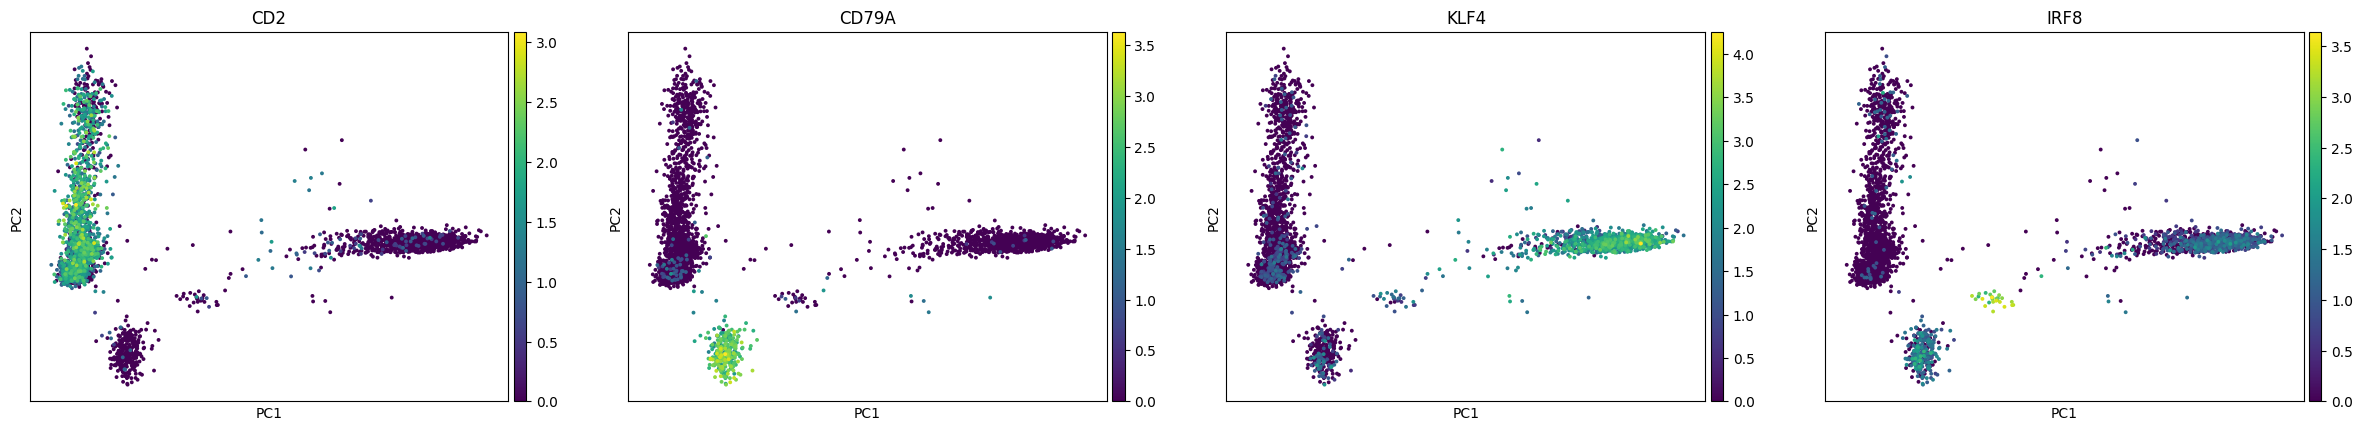

In [37]:
sc.pl.pca(rna, color=['CD2', 'CD79A', 'KLF4', 'IRF8'])

In [38]:
# clustering
sc.pp.neighbors(rna, n_neighbors=10, n_pcs=20)
sc.tl.leiden(rna, resolution=.75)

In [39]:
# umap
sc.tl.umap(rna, spread=1., min_dist=.5, random_state=11)

In [40]:
rna.obs['leiden_by_rna'] = rna.obs.leiden.astype("str").values
rna.obs['leiden_by_rna'] = rna.obs['leiden_by_rna'].astype("category")

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


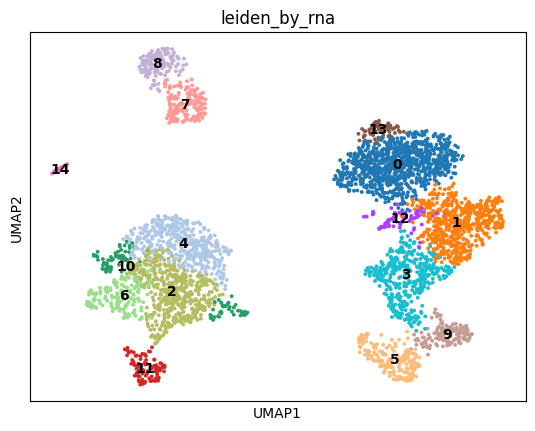

In [41]:
sc.pl.umap(rna, color="leiden_by_rna", legend_loc="on data")

In [42]:
rna.X = rna.raw.X

In [43]:
prep.calculate_differentially_expressed_genes(rna, ['leiden_by_rna'])

diff.exp. genes: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [01:08<00:00, 68.33s/it]
20231115-133621.984 55610 INFO root:369 calculate_differentially_expressed_genes: found a list of genes for these attributes: ['leiden_by_rna']


,ref_attr_value,names,scores,logfoldchanges,pvals,pvals_adj,cmp_attr_value,attribute_name
0,0,RPS3A,40.528389,1.213527,0.000000e+00,0.000000,_OTHERS_,leiden_by_rna
1,0,RPL30,40.029041,1.139426,0.000000e+00,0.000000,_OTHERS_,leiden_by_rna
2,0,RPL32,39.947823,1.192528,0.000000e+00,0.000000,_OTHERS_,leiden_by_rna
3,0,RPS6,38.817921,1.291797,0.000000e+00,0.000000,_OTHERS_,leiden_by_rna
4,0,RPL9,38.685474,1.152709,0.000000e+00,0.000000,_OTHERS_,leiden_by_rna
...,...,...,...,...,...,...,...,...
17883,13,RPSA,5.661846,0.760911,1.497531e-08,0.000001,14,leiden_by_rna
17884,13,CD69,5.563301,4.999782,2.647183e-08,0.000002,14,leiden_by_rna
17885,13,BCL11B,5.500591,5.153860,3.785204e-08,0.000002,14,leiden_by_rna
17886,13,RPL27,5.402046,0.753481,6.588499e-08,0.000004,14,leiden_by_rna


In [44]:
prep.remove_raw_and_layers(rna)

In [45]:
# combine sample annotations into one dataframe
mdata.update_obs()

In [46]:
mdata.obs

,prot:leiden,prot:leiden_by_prot,rna:n_genes_by_counts,rna:total_counts,rna:total_counts_mt,rna:pct_counts_mt,rna:leiden,rna:leiden_by_rna
AAACCCAAGAGACAAG-1,1,1,2363.0,7375.0,467.0,6.332204,2,2
AAACCCAAGGCCTAGA-1,0,0,1259.0,3772.0,343.0,9.093319,0,0
AAACCCAGTCGTGCCA-1,2,2,1578.0,4902.0,646.0,13.178295,1,1
AAACCCATCGTGCATA-1,2,2,1908.0,6704.0,426.0,6.354415,1,1
AAACGAAAGACAAGCC-1,7,7,1589.0,3900.0,363.0,9.307693,10,10
...,...,...,...,...,...,...,...,...
TTTGTTGCAGCACAAG-1,3,3,1649.0,4754.0,468.0,9.844342,3,3
TTTGTTGCAGTCTTCC-1,2,2,1901.0,6373.0,553.0,8.677233,1,1
TTTGTTGCATGGCCCA-1,3,3,NaN,NaN,NaN,NaN,NaN,NaN
TTTGTTGCATTGCCGG-1,1,1,3443.0,12220.0,1287.0,10.531915,2,2


In [47]:
mdata.mod['prot'].X.shape

(5247, 32)

In [48]:
mdata.mod['rna'].X.shape

(3891, 17806)

In [49]:
prep.set_cellenium_metadata(
    mdata,
    title='PBMC5k multiomics',
    description='Peripheral blood mononuclear cells (PBMCs) provided by 10x Genomics',
    taxonomy_id=9606,
    ncit_tissue_ids=['C12434'],
    mesh_disease_ids=[],
    X_pseudolayer_name='norm_log_expression',
    modalities = {'prot':'protein_antibody_tag','rna':'gene'},
    main_sample_attributes={'prot':['leiden_by_prot'], 'rna': ['leiden_by_rna']}
)

In [50]:
mdata.write(prep.basedir / "pbmc3k_processed.h5mu")

/Users/dan.plischke@bayer.com/anaconda3/envs/cellenium_import/lib/python3.10/site-packages/mudata/_core/mudata.py:491: UserWarning: Cannot join columns with the same name because var_names are intersecting.
  warnings.warn(


In [51]:
mdata.mod

{'prot': AnnData object with n_obs × n_vars = 5247 × 32
     obs: 'leiden', 'leiden_by_prot'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'cellenium'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     obsp: 'distances', 'connectivities',
 'rna': AnnData object with n_obs × n_vars = 3891 × 17806
     obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'leiden_by_rna'
     var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
     uns: 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_by_rna_colors', 'cellenium'
     obsm: 'X_pca', 'X_umap'
     varm: 'PCs'
     obsp: 'distances', 'connectivities'}

In [52]:
prep.jupyter_h5ad_overview(rna)

,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,leiden_by_rna
AAACCCAAGAGACAAG-1,2363,7375.0,467.0,6.332204,2,2
AAACCCAAGGCCTAGA-1,1259,3772.0,343.0,9.093319,0,0
AAACCCAGTCGTGCCA-1,1578,4902.0,646.0,13.178295,1,1
AAACCCATCGTGCATA-1,1908,6704.0,426.0,6.354415,1,1
AAACGAAAGACAAGCC-1,1589,3900.0,363.0,9.307693,10,10
...,...,...,...,...,...,...
TTTGGTTGTACGAGTG-1,1450,5666.0,367.0,6.477232,0,0
TTTGTTGAGTTAACAG-1,3068,10213.0,896.0,8.773132,6,6
TTTGTTGCAGCACAAG-1,1649,4754.0,468.0,9.844342,3,3
TTTGTTGCAGTCTTCC-1,1901,6373.0,553.0,8.677233,1,1


,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
AL627309.1,ENSG00000238009,Gene Expression,GRCh38,False,27,0.005146,99.485420,27.0,False,0.009610,0.523342,-0.401568,0.005802,0.073004
AL669831.5,ENSG00000237491,Gene Expression,GRCh38,False,276,0.056604,94.739851,297.0,False,0.083894,0.634743,-0.002523,0.050525,0.216804
FAM87B,ENSG00000177757,Gene Expression,GRCh38,False,10,0.002096,99.809415,11.0,False,0.002061,0.207000,-1.534726,0.001355,0.032532
LINC00115,ENSG00000225880,Gene Expression,GRCh38,False,226,0.045550,95.692777,239.0,False,0.065864,0.589200,-0.165662,0.039798,0.191849
FAM41C,ENSG00000230368,Gene Expression,GRCh38,False,80,0.015628,98.475319,82.0,True,0.025291,0.818824,0.656866,0.014638,0.118417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC011043.1,ENSG00000276256,Gene Expression,GRCh38,False,5,0.000953,99.904707,5.0,False,0.000666,-0.084492,-2.578868,0.000475,0.017399
AL592183.1,ENSG00000273748,Gene Expression,GRCh38,False,353,0.070516,93.272346,370.0,False,0.114822,0.580609,-0.196433,0.070095,0.254548
AC007325.4,ENSG00000278817,Gene Expression,GRCh38,False,39,0.007623,99.256718,40.0,False,0.011842,0.447380,-0.673670,0.007307,0.080375
AL354822.1,ENSG00000278384,Gene Expression,GRCh38,False,99,0.019059,98.113208,100.0,False,0.031392,0.724132,0.317673,0.017992,0.134321


(3891, 17806)

<3891x17806 sparse matrix of type '<class 'numpy.float32'>'
	with 7699418 stored elements in Compressed Sparse Row format>

OrderedDict([('log1p', {'base': None}),
             ('hvg', {'flavor': 'seurat'}),
             ('pca',
              {'params': {'zero_center': True, 'use_highly_variable': True},
               'variance': array([170.99928  ,  50.600204 ,  39.888004 ,  13.999665 ,  11.871042 ,
                       11.347728 ,   7.3518686,   6.282973 ,   5.6775823,   5.422566 ,
                        5.1050115,   4.925281 ,   4.6496787,   3.8056562,   3.5928798,
                        3.2914097,   3.0057452,   2.884097 ,   2.7999325,   2.66341  ,
                        2.6458852,   2.627607 ,   2.5684876,   2.5477893,   2.5315614,
                        2.4962866,   2.4843884,   2.4809692,   2.4603858,   2.4501622,
                        2.4458368,   2.4411614,   2.412391 ,   2.3998864,   2.3945458,
                        2.3894382,   2.3723016,   2.365254 ,   2.3431602,   2.3387945,
                        2.337496 ,   2.3220682,   2.3096905,   2.3049045,   2.2967749,
                       

In [53]:
prep.jupyter_h5ad_overview(prot)

,leiden,leiden_by_prot
AAACCCAAGAGACAAG-1,1,1
AAACCCAAGGCCTAGA-1,0,0
AAACCCAGTCGTGCCA-1,2,2
AAACCCATCGTGCATA-1,2,2
AAACGAAAGACAAGCC-1,7,7
...,...,...
TTTGTTGCAGCACAAG-1,3,3
TTTGTTGCAGTCTTCC-1,2,2
TTTGTTGCATGGCCCA-1,3,3
TTTGTTGCATTGCCGG-1,1,1


,gene_ids,feature_types,genome
CD3,CD3,Antibody Capture,
CD4,CD4,Antibody Capture,
CD8a,CD8a,Antibody Capture,
CD11b,CD11b,Antibody Capture,
CD14,CD14,Antibody Capture,
CD15,CD15,Antibody Capture,
CD16,CD16,Antibody Capture,
CD19,CD19,Antibody Capture,
CD20,CD20,Antibody Capture,
CD25,CD25,Antibody Capture,


(5247, 32)

<5247x32 sparse matrix of type '<class 'numpy.float32'>'
	with 155437 stored elements in Compressed Sparse Column format>

OrderedDict([('pca',
              {'params': {'zero_center': True, 'use_highly_variable': False},
               'variance': array([7.4338784 , 3.1115897 , 2.0867586 , 1.7648817 , 1.195141  ,
                      0.8423755 , 0.45026186, 0.34342238, 0.28565738, 0.24252863,
                      0.20107599, 0.18239853, 0.17074701, 0.15900902, 0.1319178 ,
                      0.12191051, 0.10781283, 0.10366223, 0.10253765, 0.09481783,
                      0.08874461, 0.08635654, 0.08555914, 0.0807559 , 0.07511261,
                      0.0690167 , 0.05760415, 0.05108605, 0.04964099, 0.04283881,
                      0.03416491], dtype=float32),
               'variance_ratio': array([0.373843  , 0.15647903, 0.1049412 , 0.0887543 , 0.06010256,
                      0.0423623 , 0.02264326, 0.0172704 , 0.01436545, 0.01219655,
                      0.01011193, 0.00917266, 0.00858671, 0.00799642, 0.00663403,
                      0.00613077, 0.00542181, 0.00521308, 0.00515653, 0.0047683 ,


In [54]:
mdata.uns

{'cellenium': {'main_sample_attributes': {'prot': ['leiden_by_prot'],
   'rna': ['leiden_by_rna']},
  'title': 'PBMC5k multiomics',
  'description': 'Peripheral blood mononuclear cells (PBMCs) provided by 10x Genomics',
  'taxonomy_id': 9606,
  'ncit_tissue_ids': ['C12434'],
  'mesh_disease_ids': [],
  'X_pseudolayer_name': 'norm_log_expression',
  'secondary_sample_attributes': [],
  'import_projections': {'prot': ['umap'], 'rna': ['umap']},
  'initial_reader_permissions': None,
  'initial_admin_permissions': None,
  'modalities': {'prot': 'protein_antibody_tag', 'rna': 'gene'},
  'metadata': {}}}